## 1標本のt検定の事例

母集団から無作為抽出された1つの標本にてついて、その母集団の平均値に対して標本平均が等しいかどうか？を検定する。

### (0)事前準備

In [1]:
# ライブラリ
import os
import sys
sys.path.append("../../scripts")
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
np.random.seed(111)
import random
random.seed(111)

# scipy
from scipy import stats
# graph
import matplotlib.pyplot as plt
import seaborn as sns

# scripts
import utils as u
# graph setting
u.graph_setting()

### (0) テーマのためのデータセット

In [2]:
# scikit-learnに用意されている、アヤメのデータセットを使う
from sklearn.datasets import load_iris
iris = load_iris()

# irisのデータセットは、辞書型で格納されているので、扱いやすいようにpandasのデータフレームに変換する。
# 各特徴データ
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# ラベル, 種類のデータ。各数値ラベルを名前に置き換えて加える。
df["target"] = [iris.target_names[t] for t in iris.target]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
# データセットの準備
# 'setosa'のデータを20サンプル抽出
df_setosa = df[df["target"]=="setosa"].sample(30, random_state=111).reset_index(drop=True)

# sampling values
values = df_setosa["sepal length (cm)"].values
print(f"Sample count -> Sample = {len(values)}")
values

Sample count -> Sample = 30


array([5.5, 4.8, 5.4, 4.9, 5.4, 4.7, 5.1, 5.1, 5.1, 5. , 5.7, 5.5, 4.9,
       4.4, 5.3, 4.6, 5. , 4.8, 5. , 5.1, 5. , 5.2, 5.2, 4.3, 5. , 4.6,
       4.9, 5.4, 4.4, 4.8])

### (0) データを確認

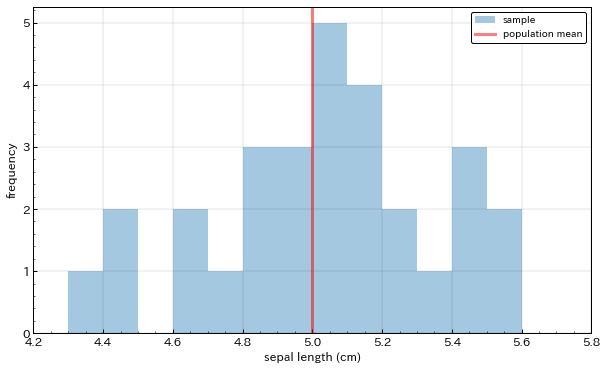

In [8]:
# ヒストグラム
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(values, bins=np.arange(np.min(values)-0.1, np.max(values)+0.1, 0.1), kde=False, ax=ax, label="sample")
ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("frequency")
ax.set_xlim([np.min(values)-0.1, np.max(values)+0.1])
ax.axvline(x=5.0, ymin=0, ymax=5, color="red", lw=3, linestyle="-", alpha=0.5, label="population mean")
ax.legend()

### (0) 想定する分析シーン
- ある花畑での'setosa'の'sepal length(cm)'の平均は、5cmであると設定する。<br>
- 取得したデータはある1区画のデータとし、その内30本無作為抽出したものとする。<br>

全体の平均値に対して差があるといえるか？を統計的に検定する。<br>

### (1) 問題設定
- 帰無仮説$H_0$と対立仮説$H_1$を定義する。<br>

帰無仮説$H_0$：'setosa'の'sepal length'は5cmで全体平均と変わらない。<br>
対立仮説$H_1$：5cmと異なる。<br>

### (2) 適切な検定方法を選択する。
- 検定の目的、データの確認結果、サンプル数から適切な検定方法を選択する。<br>

1. 検定の目的<br>
-> 母集団から無作為抽出された標本グループについて、その標本平均が母集団の平均に等しいかどうか？を検定する。

2. データの確認 (ただし本分析においては仮定を置いたものとする。)<br>
    2-1. 正規性の仮定<br>
        -> 母集団は正規分布に従っている。<br>
    2-2. 独立性の仮定<br>
        -> 母集団内の個体同士は互いに独立している。<br>
    2-3. 等分散性の仮定<br>
        -> 母集団内の分散が等しい。<br>

3. サンプル数の確認<br>
    サンプル数：n=30<br>
        ->30サンプル以上であり、ある程度分布の平均値やばらつきが妥当性もって評価できると考えた。


### 検定方法：t検定を利用する。

### (3) 優位水準を定義する。
- 優位と判断する水準を定義する。<br>

優位水準$α$=5%(両側)とする。<br>

### (4) 検定統計量を計算する。
- 選択した検定方法に基づいて、検定統計量を計算する。<br>

方法1) 各統計量を求めつつ計算する

t値の計算<br>

$t = \frac{\bar{X}-\mu_0}{s/\sqrt{n}}$

各変数<br>

$\bar{X} : Xの平均値$<br>
$\mu_0 : 母集団の平均値$<br>
$s : 標本分散$<br>
$n : サンプル数$<br>

In [20]:
# 関数
def calc_tvalue(values:list, mean:float)->float:
    '''
    tを計算する

    Args
        values (list) : 計算対象の1次元リスト。numpy.arrayやpandas.Seriesも可
        mean (float) : 母集団の平均値

    Return
        t : 計算されたt値を返す。
    '''

    # calc mean
    m = np.mean(values)
    # calc std, 不偏標本標準偏差を使う
    s = np.std(values, ddof=1)
    # dataset count
    n = len(values)

    # calc standard error
    se = s / np.sqrt(n)

    # t value
    t = (m-mean) / se

    # print each value
    print(f"Average : {m}")
    print(f"Standard error : {se}")
    print(f"t value : {t}")

    return t

In [22]:
# t値を計算する
t = calc_tvalue(values=values, mean=5.0)

# 両側信頼係数のt値を求める。
# 自由度
d = len(values) -1
# 片側優位水準
alpha = 0.025

# scipy.statsを使って計算する。
t_thre = stats.t.ppf(1 - alpha/2, d)
print(f"t value threshold : {t_thre}")

Average : 5.003333333333334
Standard error : 0.06296931077609838
t value : 0.05293583957407878
t value threshold : 2.3638460732082978


方法2) scipy.stats.ttest_1samp()関数を使って計算する。

In [13]:
t_value, p_value = stats.ttest_1samp(a=values, popmean=5.0, alternative="two-sided", )

print(f"t value : {t_value}")

t value : 0.05293583957407878


### (5) p値を計算する。
- 検定統計量に基づいてp値を計算する。<br>

In [17]:
print(f"p value : {p_value}")

p value : 0.9581460055705747


### (6) 結果を解釈する。
- p値と優位水準を比較して結果を解釈する。<br>
p値≦$α$：帰無仮説を棄却し、対立仮説を採択する。<br>
p値>$α$：帰無仮説を棄却できない

### 判定
p値は0.958と優位水準5%より大きい。よって帰無仮説は棄却されない。<br>
-> 差は無い

t分布表を見て、値の関係をイメージする。

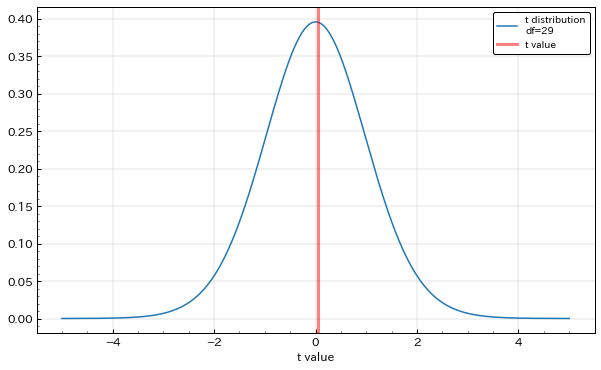

In [18]:
# t分布サンプリング
t_range = np.linspace(-5,5,200)
t_value_ar = []
for i in t_range:
    t_value_ar.append(stats.t.pdf(x=i, df=len(values)-1))

# plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(t_range, t_value_ar, label="t distribution\ndf={}".format(len(values)-1))
# t value
ax.axvline(x=t_value, ymin=0, ymax=1, color="red", lw=3, linestyle="-", alpha=0.5, label="t value")
ax.set_xlabel("t value")
ax.legend()

### (7) 効果量を計算する。
- 検定の結果が優位であれば、効果量を計算し意義を評価する。<br>

### 判定
結果は優位でないため、評価無し。<br>